In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
import warnings


In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
# DATA CLEANSING

In [4]:
## Listing null values from data

In [5]:
print(df.isnull().sum())


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [6]:
## Describing the whole data

In [7]:
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


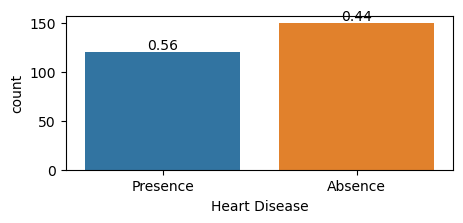

In [8]:
## RELATIONSHIP IN HEART DISEASE RATIO

import seaborn as sns
def plotTarget():
    sns.countplot(x='Heart Disease', data=df, ax=ax)
    for i, p in enumerate(ax.patches):
        count=df['Heart Disease'].value_counts().values[i]
        x=p.get_x()+ p.get_width() /2.
        y=p.get_height() + 3
        label='{:1.2f}'.format(count / float(df.shape[0]))
        ax.text(x, y,label, ha='center')
        
fig_target,ax=plt.subplots(nrows=1, ncols=1, figsize=(5, 2))
plotTarget()

C:\Users\ME\AppData\Local\Temp\ipykernel_3700\3184430882.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


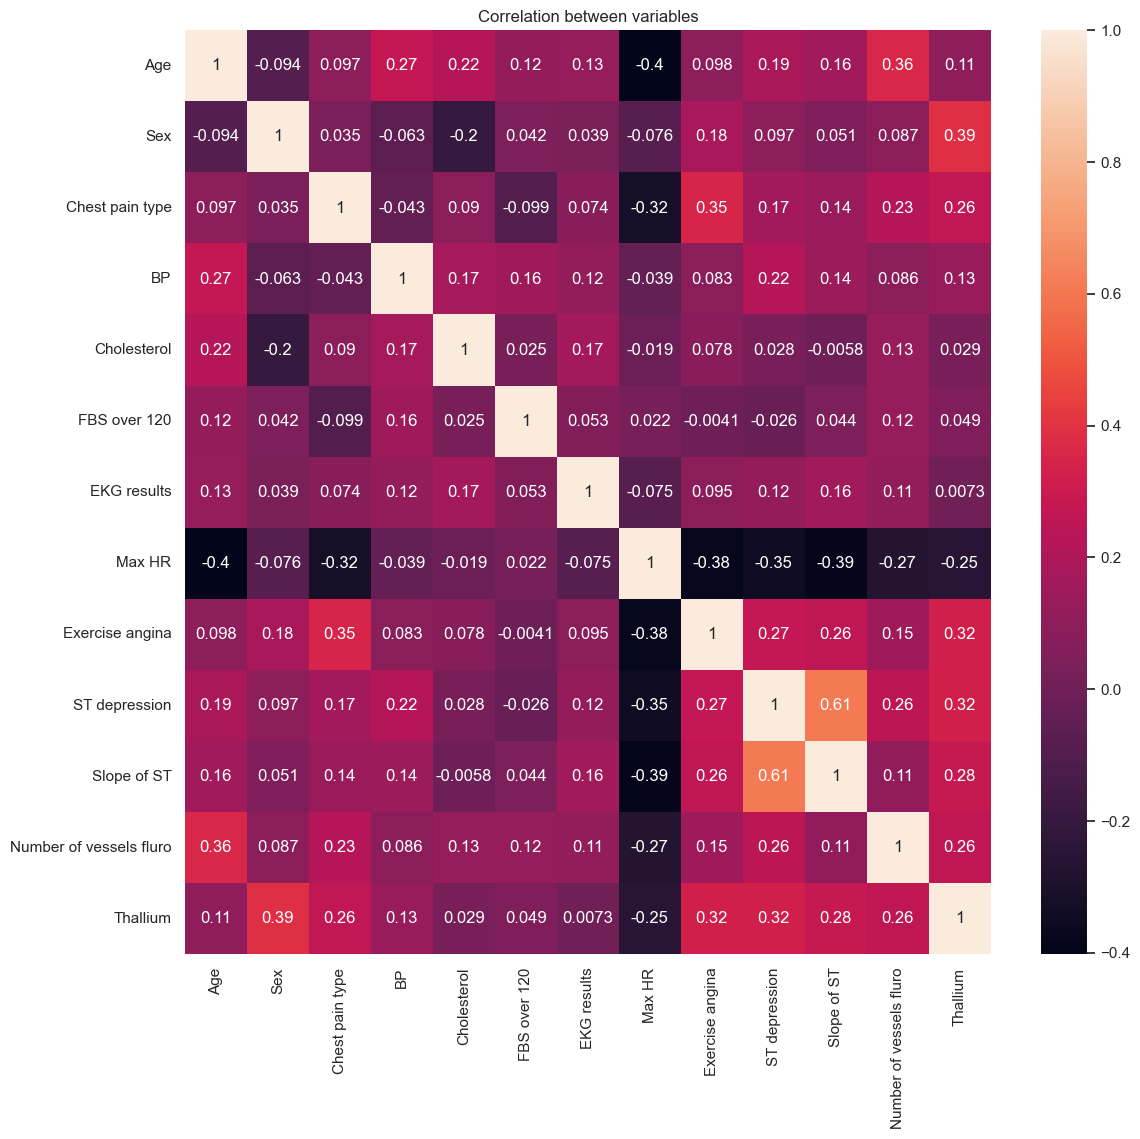

In [9]:
#correlation between variables
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(13,12)})
sns.heatmap(corrMatrix, annot=True).set_title('Correlation between variables')
plt.show()


C:\Users\ME\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\ME\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


AttributeError: 'NoneType' object has no attribute 'texts'

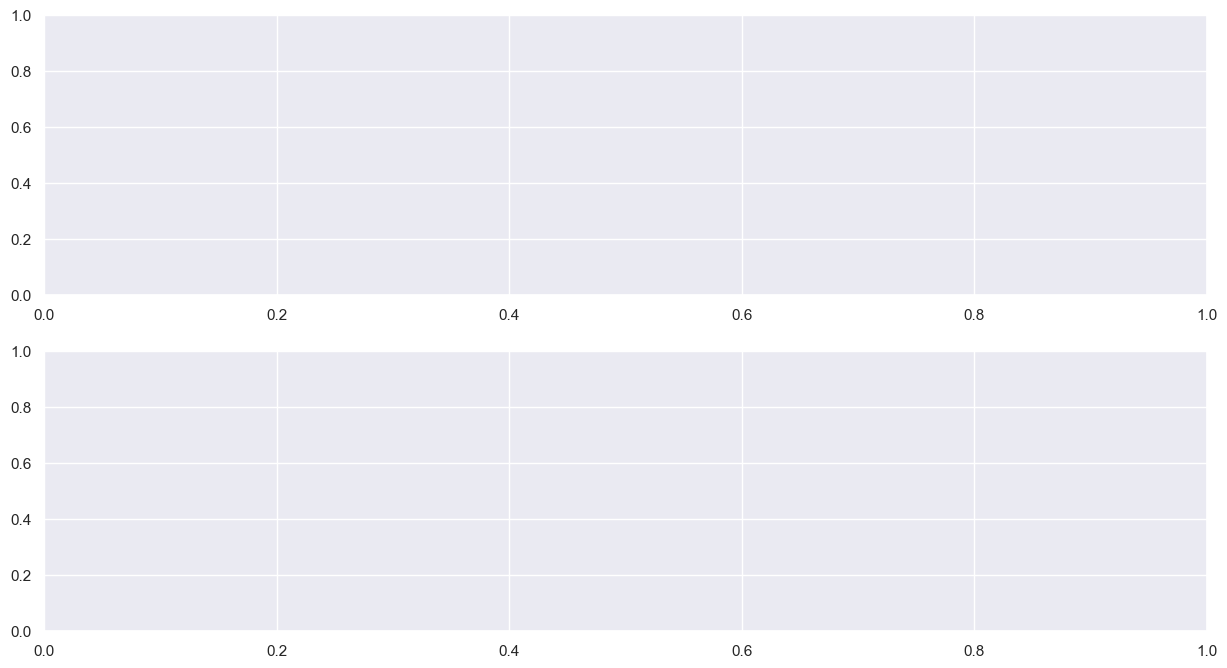

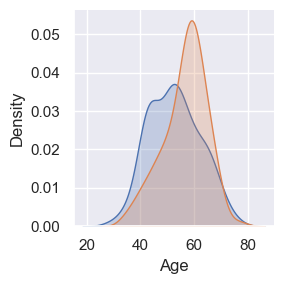

In [18]:
# Select Age as most important data on label
## Disease probability bar plot

def plotAge():
    facet_grid = sns.FacetGrid(df, hue='Heart Disease')
    facet_grid.map(sns.kdeplot, "Age", shade=True, ax=axes[0])
    legend_labels = ['Disease false', 'Disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='Age', ylabel='Density')

    avg = df[["Age", "Heart Disease"]].groupby(['Age'], as_index=False).mean()
    sns.barplot(x='Age', y='Heart Disease', data=avg, ax=axes[1])
    axes[1].set(xlabel='Age', ylabel='disease probability')

    plt.clf()

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
plotAge()



In [19]:
# Categorizing Data in Featured Importance
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [20]:
features = df[["Age", "Chest pain type", "BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro", "Thallium"]]
target = df['Heart Disease']

print(features)
print(target)

     Age  Chest pain type   BP  Cholesterol  Max HR  ST depression  \
0     70                4  130          322     109            2.4   
1     67                3  115          564     160            1.6   
2     57                2  124          261     141            0.3   
3     64                4  128          263     105            0.2   
4     74                2  120          269     121            0.2   
..   ...              ...  ...          ...     ...            ...   
265   52                3  172          199     162            0.5   
266   44                2  120          263     173            0.0   
267   56                2  140          294     153            1.3   
268   57                4  140          192     148            0.4   
269   67                4  160          286     108            1.5   

     Number of vessels fluro  Thallium  
0                          3         3  
1                          0         7  
2                          0        

[0.10612304 0.13345895 0.10899441 0.10954949 0.12502688 0.13222113
 0.1285074  0.15611871]


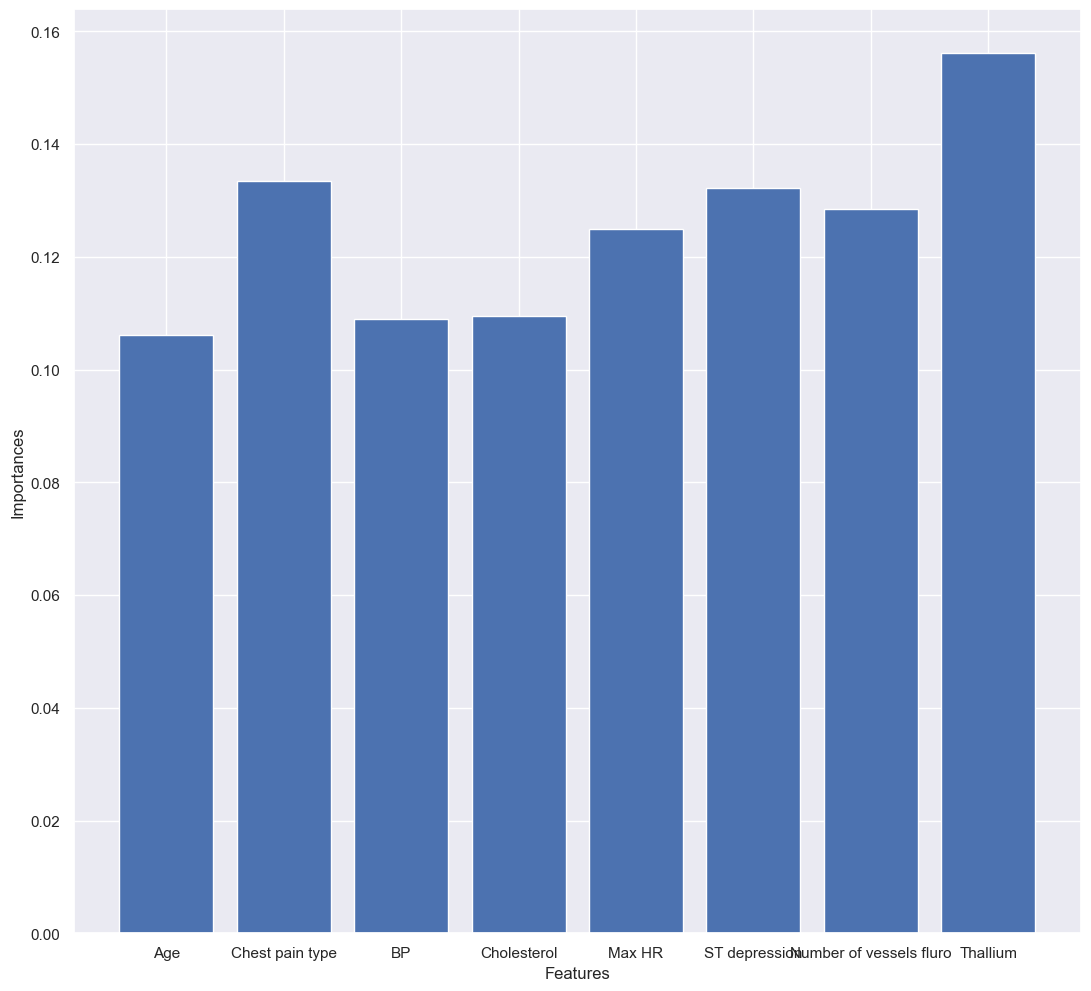

In [22]:
## Finding Accuracy and result

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 3136)

model = RandomForestClassifier()
model.fit(x_train, y_train)

print(model.feature_importances_)
x = features.columns
y = model.feature_importances_
plt.bar(x,y)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.show()

In [23]:
y_pred = model.predict(x_test)



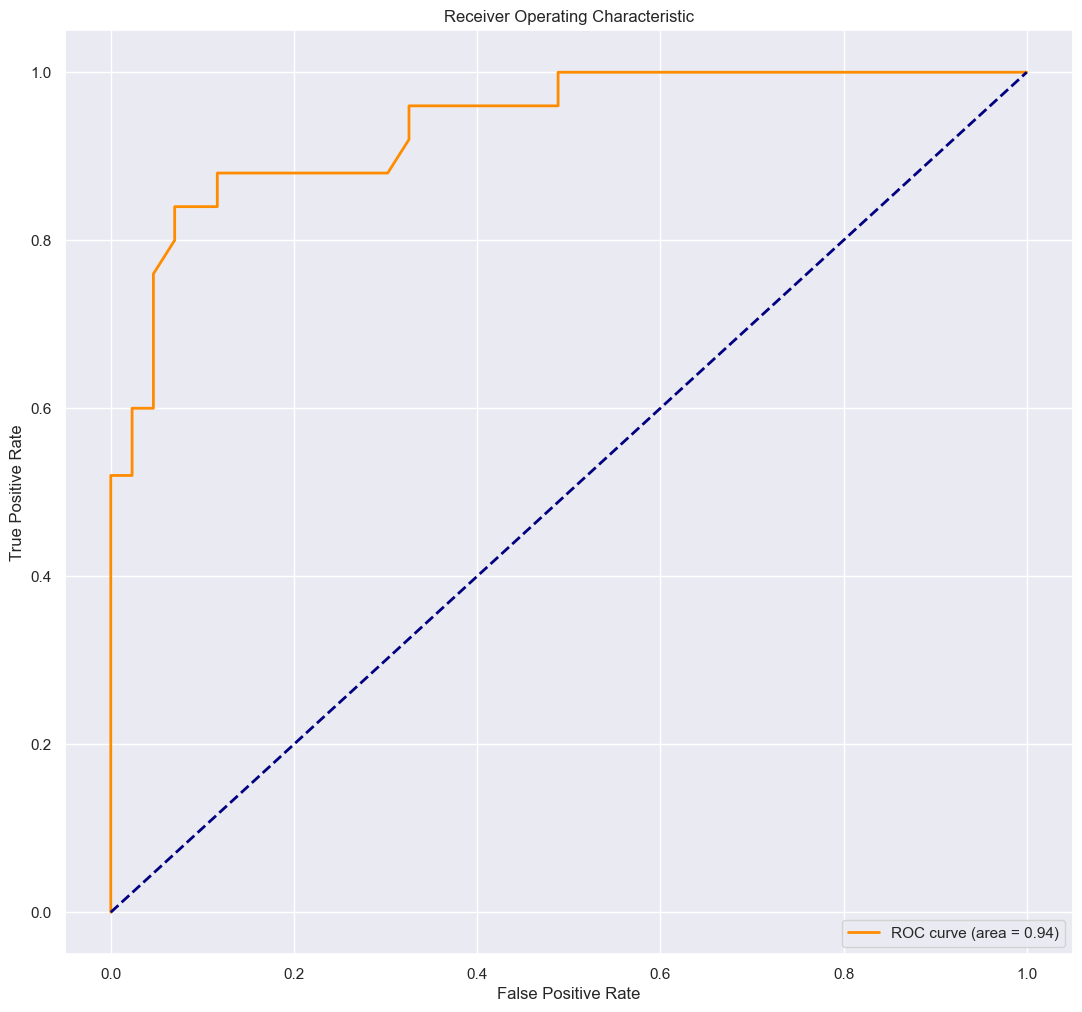

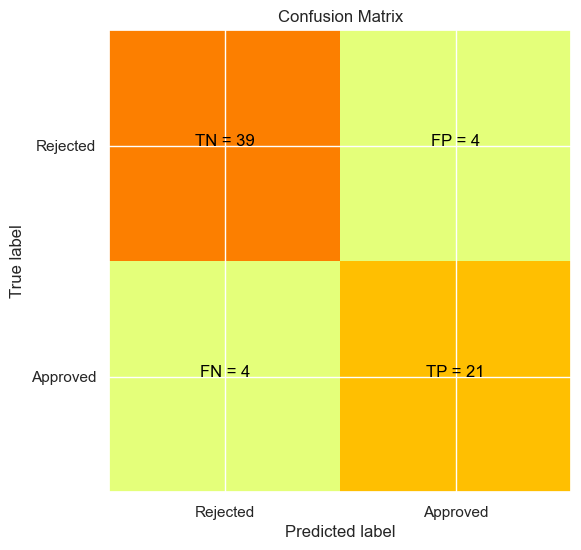

[[39  4]
 [ 4 21]]
Accuracy: 0.88
MCC: 0.75
Precision: 0.84
Recall: 0.84
F1-Score: 0.84


In [25]:
## Performing Evaluation Metrics

from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Categorizing Data in Featured Importance
features = df[["Age", "Chest pain type", "BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro", "Thallium"]]
target = df['Heart Disease']

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=3136)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# ROC Curve Calculation
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC Curve Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

def plot_confusion_matrix(y_test, model_test):
    cm = confusion_matrix(y_test, model_test)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Rejected', 'Approved']  # Change these based on your labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    labels = ['TN', 'FP', 'FN', 'TP']
    label_index = 0
    for i in range(2):
        for j in range(2):
            plt.text(j, i, f"{labels[label_index]} = {cm[i, j]}", horizontalalignment='center', color='black')
            label_index += 1

    plt.show()

plot_confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

In [26]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
